# Compute Unitary Matrix

## General Description

This is a python programm that takes a matrix and makes it unitary based on its norm.

Matrix is **NOT** given as input, rather than it is defined here

## Instructions

The operator norm, or spectral norm is the largest singular value of A.

Singular values are the square roots of the eigenvalues of $A^{\dagger}A$

Steps:
- Compute $P=A^{\dagger}A$
- Compute the eigenvalues of $P$.
- Find the maximum eigenvalue.
- Compute the square root of the maximum eigenvalue.

Or oneliner:
$||A||_{2} = \sqrt{\lambda_{\max}(A^{\dagger}A)}$

This equals to the norm of A, which:
- If less than 1: top left corner of the matrix is $C=A/||A||_{2}$
- If greater than 1: top left corner of the matrix is $A$

So TopLeft equals A or C.
And the rest of the Unitary matrix U, equals to:
$$ U =
\begin{pmatrix}
TopLeft & \sqrt{I - TopLeft^{\dagger} TopLeft} \\\\
\sqrt{I - TopLeft TopLeft^{\dagger}} & - TopLeft^{\dagger}
\end{pmatrix}
$$

# Code

## Imports, colors and helping functions

In [1]:
# Imports
import sys
from datetime import datetime
import numpy as np
from scipy.linalg import sqrtm
# Graph option 1
import networkx as nx
import matplotlib.pyplot as plt
# Graph option 2
from graphviz import Digraph

In [2]:
# Colors
RED = '\033[91m'
BLUE = '\033[94m'
YELLOW = '\033[93m'
GREEN = '\033[92m'
RESET = '\033[0m'

In [3]:
# Logging function to print (at least debug) logs
#   Args:
#       level: log level [debug, info, error]
#       rest of args: message
def print_log(level, *args):
    # Set debug mode
    debug = False
    # debug = True

    # Set timestamp format
    timestamp = datetime.now().strftime('%m-%d %H:%M:%S')

    # Set colors based on level
    if level == 'debug': color = YELLOW
    elif level == 'info': color = BLUE
    elif level == 'error': color = RED
    else: print_log('error', 'Invalid log level')

    # Get message
    message = ' '.join(map(str, args))
    if (level != 'debug') or (debug and level == 'debug'):
        print(f'[{timestamp}][{color}{level}{RESET}]\n{message}')

    # Exit if error
    if level == 'error': sys.exit(1)

In [4]:
# Function that calculates norm of a matrix
#   Args:
#       A: Matrix
#   Returns norm of matrix A
def calc_norm(A):
    print_log('debug', ">>> Starting function: calc_norm")
    print_log('debug', ">>> Matrix input:\n", A)

    # Get conjugate of A
    A_conjugate = np.conjugate(A)
    print_log('debug', ">>> Matrix input, conjugate:\n", A_conjugate)

    # Get transpose of A conjugate
    A_dagger = np.transpose(A_conjugate)
    print_log('debug', ">>> Matrix input, transpose conjugate:\n", A_dagger)

    # Product of A_dagger and A
    P = np.dot(A_dagger, A)
    print_log('debug', ">>> Matrix input dagger @ matrix input = P:\n", P)

    # Get eigenvalues of P
    eigenvalues = np.linalg.eigvals(P)
    print_log('debug', ">>> Eigenvalues of matrix P:\n", eigenvalues)

    # Get max eigenvalue
    max_eigenvalue = np.max(eigenvalues)
    print_log('debug', ">>> Max eigenvalue of matrix P:\n", max_eigenvalue)

    # Get square root of max eigenvalue aka norm of matrix input
    norm_A = np.sqrt(max_eigenvalue)

    return norm_A

In [5]:
# Function that calculates a unitary matrix that contains a NON unitary matrix A
#   in its top left corner
#   Args:
#       A: Non unitary matrix
#   Returns unitary matrix U
def calc_unitary(A):
    print_log('debug', ">>> Starting function: calc_unitary")
    print_log('debug', ">>> Matrix input:\n", A)

    # Calculate norm of input matrix A
    norm_A = calc_norm(A)
    print_log('debug', ">>> Norm of matrix input:\n", norm_A)

    # Get number of rows/columns of A (I guess they are equal)
    n = A.shape[0]
    print_log('debug', ">>> Number of rows/columns of matrix input:\n", n)

    # Check if norm is lower or equal to 1
    if norm_A <= 1:
        # Top left corner will contain A
        top_left = A
    # Check if norm is greater than 1
    else:
        # Top left corner will contain C, which is A/norm_A
        top_left = A/norm_A

    # Calculate X_dagger@X and X@X_dagger (needed later on)
    # Where X is top left corner
    top_left_dagger = np.transpose(np.conjugate(top_left))
    top_left_x_top_left_dagger = np.dot(top_left, top_left_dagger)
    top_left_dagger_x_top_left = np.dot(top_left_dagger, top_left)
    print_log('debug', ">>> Matrix top left:\n", top_left)

    # Bottom left
    bottom_left = sqrtm(np.identity(n) - top_left_dagger_x_top_left)
    print_log('debug', ">>> Matrix left right:\n", bottom_left)

    # Top right
    top_right = sqrtm(np.identity(n) - top_left_x_top_left_dagger)
    print_log('debug', ">>> Matrix top right:\n", top_right)

    # Bottom right
    bottom_right = -top_left_dagger
    print_log('debug', ">>> Matrix bottom right:\n", bottom_right)

    # Unitary matrix U
    U = np.block([
        [top_left, top_right],
        [bottom_left, bottom_right]
        ])

    return U

In [6]:
# Validate Unitary
#   Args:
#        U: Unitary matrix
#   Returns True or False based on if U is unitary
def validate_unitary(U):
    is_unitary = False

    print_log('debug', ">>> Starting function: validate_unitary")
    print_log('debug', ">>> Matrix input:\n", U)

    # Get number of rows/columns of U (I guess they are equal)
    n = U.shape[0]
    print_log('debug', ">>> Number of rows/columns of matrix input:\n", n)

    # Check if U is unitary by computing U@U_dagger
    U_dagger = np.transpose(np.conjugate(U))
    U_dagger_x_U = np.dot(U_dagger, U)
    print_log('debug', ">>> Matrix input dagger @ matrix input:\n", U_dagger_x_U)

    # Check if U_dagger_x_U is identity matrix
    if np.allclose(U_dagger_x_U, np.identity(n)):
        print_log('debug', ">>> U is unitary")
        is_unitary = True

    return is_unitary

## Code Example 1

Non Unitary Matrix example

$$ A =
\begin{pmatrix}
2-\sqrt{2} & 0 & 0 & 0 \\\\
0 & 2\sqrt{2} & 0 & 0 \\\\
0 & 0 & \sqrt{2} & 0 \\\\
0 & 0 & 0 & 2
\end{pmatrix}
$$

In [7]:
# Define A example
A = np.array([[2-np.sqrt(2), 0, 0, 0],
              [0, 2*np.sqrt(2), 0, 0],
              [0, 0, 2*np.sqrt(2), 0],
              [0, 0, 0, 2]])
print_log('info', "Matrix A:\n", A)

[12-02 16:07:32][info]
Matrix A:
 [[0.58578644 0.         0.         0.        ]
 [0.         2.82842712 0.         0.        ]
 [0.         0.         2.82842712 0.        ]
 [0.         0.         0.         2.        ]]


In [8]:
# Calculate norm of A for a non unitary matrix
normA = calc_norm(A)
print_log('info', "Norm of matrix A:\n", normA)

[12-02 16:07:32][info]
Norm of matrix A:
 2.8284271247461903


In [9]:
# Calculate unitary matrix for a non unitary matrix
U = calc_unitary(A)
print_log('info', "Unitary matrix U, calculated from not-unitary matrix A:\n", U)

[12-02 16:07:32][info]
Unitary matrix U, calculated from not-unitary matrix A:
 [[ 0.20710678  0.          0.          0.          0.97831834  0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.70710678  0.          0.
   0.          0.70710678]
 [ 0.97831834  0.          0.          0.         -0.20710678 -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.         -0.         -1.
  -0.         -0.        ]
 [ 0.          0.          0.          0.         -0.         -0.
  -1.         -0.        ]
 [ 0.          0.          0.          0.70710678 -0.         -0.
  -0.         -0.70710678]]


/tmp/ipykernel_32226/312715929.py:35: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  bottom_left = sqrtm(np.identity(n) - top_left_dagger_x_top_left)
/tmp/ipykernel_32226/312715929.py:39: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  top_right = sqrtm(np.identity(n) - top_left_x_top_left_dagger)


### **Warning**
Since the norm of matrix A is higher than one, the resulting unitary matrix U contains
$C = A/norm(A)$ in its top left corner (not A)

In [10]:
# Top left corner should contain:
print_log('info', "Matrix A/norm(A) = C:\n", A/normA)

[12-02 16:07:32][info]
Matrix A/norm(A) = C:
 [[0.20710678 0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.70710678]]


In [11]:
# Validate Unitary
is_unitary = validate_unitary(U)
print_log('info', "Is U unitary?:\n", is_unitary)

[12-02 16:07:32][info]
Is U unitary?:
 True


## Code Example 2 (Pennylane)

https://pennylane.ai/qml/demos/tutorial_intro_qsvt

Non Unitary Matrix example

$$ B =
\begin{pmatrix}
0.1 & 0.2 \\\\
0.3 & 0.4
\end{pmatrix}
$$

In [12]:
# Oneliners example for B:
B = np.array([[0.1, 0.2],
              [0.3, 0.4]])
print_log('info', "Matrix B:\n", B)
print_log('info', "Unitary U that contains B in top left corner:\n", calc_unitary(B))
print_log('info', "Is U unitary ?:\n", validate_unitary(calc_unitary(np.array([[0.1, 0.2],
                                                                               [0.3, 0.4]]))))

[12-02 16:07:32][info]
Matrix B:
 [[0.1 0.2]
 [0.3 0.4]]
[12-02 16:07:32][info]
Unitary U that contains B in top left corner:
 [[ 0.1         0.2         0.97283788 -0.05988708]
 [ 0.3         0.4        -0.05988708  0.86395228]
 [ 0.94561648 -0.07621992 -0.1        -0.3       ]
 [-0.07621992  0.89117368 -0.2        -0.4       ]]
[12-02 16:07:32][info]
Is U unitary ?:
 True


# Markov Models

Create a Markov Model with a non-unitary matrix N, then create a unitary matrix U that contains N in its top left corner.

## Graph transitions, Slides example [Matplotlib and Networkx]

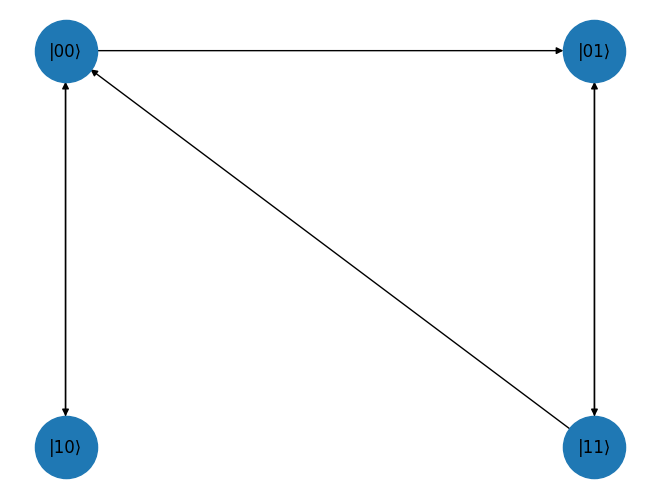

In [13]:
# Slides example
G = nx.DiGraph()
edges = [
        ('|00⟩', '|01⟩'),
        ('|00⟩', '|10⟩'),
        ('|01⟩', '|11⟩'),
        ('|10⟩', '|00⟩'),
        ('|11⟩', '|00⟩'),
        ('|11⟩', '|01⟩')
]
G.add_edges_from(edges)

pos = {
    '|00⟩': (-1, 1),
    '|01⟩': (1, 1),
    '|10⟩': (-1, -1),
    '|11⟩': (1, -1)
}
nx.draw(G, pos, with_labels=True,
        node_size=2000, arrows=True)
plt.show()

In [14]:
# ## Graph transitions, Slides example [Graphviz]
# g = Digraph('States', format='png', engine='dot')
#
# # Node style
# g.attr('node', shape='circle')
#
# # Nodes
# g.node('00', '|00⟩')
# g.node('01', '|01⟩')
# g.node('10', '|10⟩')
# g.node('11', '|11⟩')
#
# # Edges
# g.edge('00', '01')
# g.edge('00', '11')
# g.edge('01', '11')
# g.edge('10', '00')
# g.edge('11', '00')
# g.edge('11', '01')
# g

## Matrix transitions, Slides example

Extract the matrix out of the possible transitions presented in the graph.

Node |00⟩ has two equally possible options: |01⟩ and |10⟩, so transitions equal:

$|00⟩ \rightarrow \frac{1}{\sqrt{2}}(|01⟩ + |10⟩)$

Similarly for all the other nodes:

$|01⟩ \rightarrow |11⟩$

$|10⟩ \rightarrow |00⟩$

$|11⟩ \rightarrow \frac{1}{\sqrt{2}}(|00⟩ - |01⟩)$

So the next superposition state is:
$$|q_{t+1}⟩ = \frac{\sqrt{2}-1}{\sqrt{2}}|00⟩ + \frac{2}{\sqrt{2}}|01⟩ + \frac{1}{\sqrt{2}}|10⟩ + |11⟩$$

And for starting state:
$$|q_{t}⟩ = \frac{1}{2}(|00⟩ + |01⟩ + |10⟩ + |11⟩)$$

The matrix should look like this:
$$B =
\begin{pmatrix}
\frac{2(\sqrt{2}-1)}{\sqrt{2}} & 0 & 0 & 0 \\\\
0 & \frac{4}{\sqrt{2}} & 0 & 0 \\\\
0 & 0 & 2\sqrt{2} & 0 \\\\
0 & 0 & 0 & 2 \\\\
\end{pmatrix}$$

Because $|q_{t+1}⟩ = B|q_{t}⟩$ and
$$|q_{t}⟩ =
\begin{pmatrix}
\frac{1}{2} \\\\
\frac{1}{2} \\\\
\frac{1}{2} \\\\
\frac{1}{2} \\\\
\end{pmatrix}$$

In [15]:
# Matrix representation, Slides example
# Define Matrix B slides example
B = np.array([
    [ 2*(np.sqrt(2)-1)/np.sqrt(2),  0,              0,              0],
    [ 0,                            4/np.sqrt(2),   0,              0],
    [ 0,                            0,              2*np.sqrt(2),   0],
    [ 0,                            0,              0,              2]
])
print_log('info', "Matrix B:\n", B)

[12-02 16:07:32][info]
Matrix B:
 [[0.58578644 0.         0.         0.        ]
 [0.         2.82842712 0.         0.        ]
 [0.         0.         2.82842712 0.        ]
 [0.         0.         0.         2.        ]]


In [16]:
# Is matrix B unitary? Lets validate:
validate_unitary(B)

False

In [17]:
# Since B is not Unitary, lets calculate a unitary matrix that contains B in its top left corner
UB = calc_unitary(B)
print_log('info', "Matrix UB:\n", UB)
print_log('info', "Is Matrix UB Unitary?:\n", validate_unitary(UB))

[12-02 16:07:32][info]
Matrix UB:
 [[ 2.07106781e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.78318343e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.49011612e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-01]
 [ 9.78318343e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.07106781e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  1.49011612e-08  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -1.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -1.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 

/tmp/ipykernel_32226/312715929.py:35: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  bottom_left = sqrtm(np.identity(n) - top_left_dagger_x_top_left)
/tmp/ipykernel_32226/312715929.py:39: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  top_right = sqrtm(np.identity(n) - top_left_x_top_left_dagger)


Since UB is unitary, we can now perform calculation to obtain next state
$|q_{t+1}⟩ = UB|q_{t}⟩$